# 1. Imports, data loading and initial data inspection <a class="anchor" id="importing-data"></a>

### 1.1 Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import folium
import json
from folium.plugins import TimeSliderChoropleth

### 1.2 Data Loading and Initial Data Inspection

In [75]:
df_wb = pd.read_csv("wellbeing.csv")  # WELLBEING

df_mr = pd.read_csv("material_flow.csv")  # MINERALS

In [76]:
display(df_wb.head())
display(df_wb.columns)

STRUCTURE                           STRUCTURE_ID      STRUCTURE_NAME ACTION  \
0  DATAFLOW  OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1)  Current well-being      I   
1  DATAFLOW  OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1)  Current well-being      I   
2  DATAFLOW  OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1)  Current well-being      I   
3  DATAFLOW  OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1)  Current well-being      I   
4  DATAFLOW  OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1)  Current well-being      I   

  REF_AREA Reference area MEASURE    Measure UNIT_MEASURE  \
0      PRT       Portugal    10_1  Homicides    DT_10P5HB   
1      PRT       Portugal    10_1  Homicides    DT_10P5HB   
2      PRT       Portugal    10_1  Homicides    DT_10P5HB   
3      PRT       Portugal    10_1  Homicides    DT_10P5HB   
4      PRT       Portugal    10_1  Homicides    DT_10P5HB   

                  Unit of measure  ... OBS_VALUE Observation value OBS_STATUS  \
0  Deaths per 100 000 inhabitants  ...       0.6               NaN          A   
1  Deaths per 100 000 inhabitants  ...       0.8               NaN          A   
2  Deaths per 100 000 inhabitants  ...       0.5               NaN          A   
3  Deaths per 100 000 inhabitants  ...       0.8               NaN          A   
4  Deaths per 100 000 inhabitants  ...       0.6               NaN          A   

  Observation status UNIT_MULT Unit multiplier DECIMALS Decimals  BASE_PER  \
0       Normal value         0           Units        2      Two       NaN   
1       Normal value         0           Units        2      Two       NaN   
2       Normal value         0           Units        2      Two       NaN   
3       Normal value         0           Units        2      Two       NaN   
4       Normal value         0           Units        2      Two       NaN   

   Base period  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 30 columns]

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'AGE', 'Age', 'SEX', 'Sex', 'EDUCATION_LEV',
       'Education level', 'DOMAIN', 'Domain', 'TIME_PERIOD', 'Time period',
       'OBS_VALUE', 'Observation value', 'OBS_STATUS', 'Observation status',
       'UNIT_MULT', 'Unit multiplier', 'DECIMALS', 'Decimals', 'BASE_PER',
       'Base period'],
      dtype='object')

In [77]:
display(df_mr.head())
display(df_mr.columns)

Country Category                      Flow name Flow code Flow unit  \
0  Afghanistan  Biomass            Domestic Extraction        DE         t   
1  Afghanistan  Biomass  Domestic Material Consumption       DMC         t   
2  Afghanistan  Biomass        Domestic Material Input       DMI         t   
3  Afghanistan  Biomass                        Exports       EXP         t   
4  Afghanistan  Biomass                        Imports       IMP         t   

         1970        1971        1972        1973        1974  ...  \
0  29427854.0  28777035.0  27200896.0  29147772.0  30519158.0  ...   
1  29476560.0  29136965.0  27290656.0  29112673.0  30433539.0  ...   
2  29617873.0  29282898.0  27485608.0  29306247.0  30656605.0  ...   
3    141313.0    145933.0    194952.0    193574.0    223066.0  ...   
4    190019.0    505863.0    284712.0    158475.0    137447.0  ...   

         2015        2016        2017        2018        2019        2020  \
0  37406375.0  37961488.0  35542253.0  33625557.0  39501360.0  41190154.0   
1  40423146.0  41655757.0  40992559.0  38552083.0  43433438.0  45294467.0   
2  40740301.0  42111457.0  41553874.0  39515927.0  44428717.0  46059807.0   
3    317155.0    455700.0    561315.0    963844.0    995279.0    765341.0   
4   3333926.0   4149969.0   6011621.0   5890371.0   4927357.0   4869653.0   

         2021        2022        2023        2024  
0  37576686.0  37891437.0  38353304.0  38628527.0  
1  39730808.0  40083922.0  40596386.0  40905900.0  
2  40992155.0  41370148.0  41905797.0  42238460.0  
3   1261347.0   1286226.0   1309411.0   1332559.0  
4   3415470.0   3478710.0   3552492.0   3609933.0  

[5 rows x 60 columns]

Index(['Country', 'Category', 'Flow name', 'Flow code', 'Flow unit', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [78]:
# used to print the measurement unit
def find_unit(value):
    conversion = {
        "kt" : 1_000,
        "Mt" : 1_000_000,
        "Gt" : 1_000_000_000
    }
    
    for unit, threshold in reversed(conversion.items()):
        if value >= threshold:
            return unit
    
    return "t"

def plot_flow_category(data, flow, category, years, ylabel = False, debug = False):
    years_filter = ["Country"] + [str(y) for y in years] 

    data_filters = (data["Flow name"] == flow) & (data["Category"] == category)

    data = data[data_filters][years_filter]

    data = data.dropna()

    maximum_year = str(max(years))
    data = data[data[maximum_year] > 0]

    data = data.sort_values(maximum_year, ascending=False)

    data = data.head()

    if debug:
        print(data)
        return    

    melted_df = pd.melt(
        data,
        id_vars=["Country"],
        value_vars=years_filter,
        var_name="Year",
        value_name="Value"
    )

    plot = sns.barplot(
        data=melted_df,
        x="Country",
        y="Value",
        hue="Year",
        palette="viridis"
    )

    plt.xticks(data["Country"], rotation=45)
    plot.yaxis.offsetText.set_visible(False)

    plt.xlabel("Country")
    
    if ylabel:
        plt.ylabel(f"{ylabel}")
    else:
        max_value = max(
            value for col in data.columns for value in data[col] 
            if isinstance(value, (int, float))
        )
        
        plt.ylabel(f"{flow} ({find_unit(max_value)})")

    plt.title(f"{flow} by Country for Selected Years")
    plt.legend(title="Year")

    plt.show()    

# 2. Filtering and cleaning data <a class="anchor" id="cleaning-data"></a>

### 2.1 Filtering functions

In [79]:
def filter_minerals(data, flow_name = "", category = "", year = [2023]):
    if flow_name != "":
        data = data[data["Flow name"] == flow_name]
    if category != "":
        data = data[data["Category"] == category]

    data = data.drop(columns=["Flow code", "Flow unit"])

    if len(year) == 1:
        year = str(year[0])
        data = data[["Country", year]]
        data = data.rename(columns={year: "Minerals"})
    elif len(year) > 1:
        year = [str(y) for y in year]
        data = data[["Country", "Category", "Flow name"] + year]
        data = data.melt(id_vars=["Country", "Category", "Flow name"],
                    var_name="Year", value_name="Value")
    else:
        data = data.melt(id_vars=["Country", "Category", "Flow name"],
                    var_name="Year", value_name="Value")

    return data

def filter_wellbeing(data, measure, domain, year = [2023], age = "total", sex = "total", edu = "total"):
    data = data[(data["Measure"] == measure) & (data["Domain"] == domain)]

    if len(year) != 0:
        data = data[data["TIME_PERIOD"].isin(year)]
    
    ''' parameters possible options
    age = total/young/mid/old
    sex = total/male/female
    edu = total/primary/secondary/tertiary
    '''
    
    age = age.capitalize()
    sex = sex.capitalize()
    edu = edu.capitalize()

    if age == "Mid":
        age = "Middle-aged"
    if edu != "Total":
        edu = edu + " education"

    data = data[data["Age"] == age]
    data = data[data["Sex"] == sex]
    data = data[data["Education level"] == edu]


    data = data.rename(columns={"Reference area": "Country","TIME_PERIOD": "Year", "OBS_VALUE": "Value"})
    
    return data

### 2.2 Dropping unused/duplicate columns and rows

In [80]:
# clearing rows from a dataset matching a given parameter
def remove_rows_from_dataset(rows, df):
    return df[~df["Country"].isin(rows)]

# clearing unused or duplicate columns
def remove_columns_from_dataset(rows, df):
    df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')
    return df

# removing rows related to continents and organisations, needing only countries from the minerals dataset
rows_to_remove = ["World", "Asia + Pacific", "North America", "EECCA", "West Asia", "Africa", "Europe", "Latin America + Caribbean"]
df_mr = remove_rows_from_dataset(rows_to_remove, df_mr)

# removing unused columns
columns_to_remove = ["STRUCTURE", "STRUCTURE_ID", "STRUCTURE_NAME", "ACTION", "MEASURE", "UNIT_MEASURE", "Unit of measure", "AGE", "SEX", "EDUCATION_LEV", "DOMAIN", "Time period", "Observation value", "OBS_STATUS", "UNIT_MULT", "Unit multiplier", "Units", "DECIMALS", "Decimals", "Base period", "BASE_PER"]
df_wb = remove_columns_from_dataset(columns_to_remove, df_wb)

### 2.3 Check for missing values

In [81]:
missing_per_column_minerals = df_mr.isnull().sum()
print("Missing values per column in minerals dataset:")
print(missing_per_column_minerals[missing_per_column_minerals > 0])

missing_per_column_wellbeing = df_wb.isnull().sum()
print("Missing values per column in wellbeing dataset:")
print(missing_per_column_wellbeing[missing_per_column_wellbeing > 0])

Missing values per column in minerals dataset:
1970    1687
1971    1687
1972    1687
1973    1687
1974    1687
1975    1687
1976    1687
1977    1687
1978    1687
1979    1687
1980    1687
1981    1687
1982    1687
1983    1687
1984    1687
1985    1687
1986    1687
1987    1687
1988    1687
1989    1687
1990    1687
1991    1687
1992     414
1993     343
1994     343
1995     343
1996     343
1997     343
1998     343
1999     343
2000     343
2001     343
2002     343
2003     343
2004     343
2005     343
2006     284
2007     284
2008     284
2009     284
2010     284
2011     284
2012     284
2013     284
2014     284
2015     284
2016     284
2017     284
2018     284
2019     284
2020     284
2021     284
2022     284
2023     284
2024     284
dtype: int64
Missing values per column in wellbeing dataset:
Series([], dtype: int64)


### 2.4 Replacing names for correct map plot assignations

In [82]:
def replace_country_names(df, name_dict, column="name"):
    df[column] = df[column].replace(name_dict)
    return df

country_replacements = {
    "Russian Federation": "Russia",
    "Czechia": "Czech Republic",
    "Viet Nam": "Vietnam"
}

df_mr = replace_country_names(df_mr, country_replacements, column="Country")
df_wb = replace_country_names(df_wb, country_replacements, column="Reference area")

### 2.5 Unique values for columns of interest

In [83]:
categories = df_mr["Category"].drop_duplicates().values
categories

array(['Biomass', 'Excavated earthen materials (including soil) nec',
       'Fossil fuels', 'Metal ores', 'Mixed and complex products nec.',
       'Non-metallic minerals', 'Products from biomass',
       'Products from fossil fuels', 'Products from metals',
       'Products from non-metallic minerals',
       'Waste for final treatment and disposal'], dtype=object)

In [84]:
flows = df_mr["Flow name"].drop_duplicates().values
flows

array(['Domestic Extraction', 'Domestic Material Consumption',
       'Domestic Material Input', 'Exports', 'Imports',
       'Material Footprint (RMC)', 'Physical Trade Balance',
       'Raw Material Equivalents of exports',
       'Raw Material Equivalents of imports'], dtype=object)

In [85]:
measures = df_wb["Measure"].drop_duplicates().values
measures

array(['Homicides', 'Feeling safe at night', 'Not feeling safe at night',
       'Life satisfaction', 'Life satisfaction score less than 5',
       'Negative affect balance', 'Feelings of physical pain',
       'Median net wealth', 'Employment rate', 'Gender wage gap',
       'Long-term unemployment rate',
       'Youth not in employment, education or training',
       'Labour market insecurity', 'Job strain',
       'Long hours in paid work',
       'Full-time employees earning less than two-thirds of gross median earnings',
       'Job satisfaction', 'Households living in overcrowded conditions',
       'Time off', 'Satisfaction with time use',
       'Satisfaction with time use score less than 5',
       'Life expectancy at birth', 'Perceived health as positive',
       'Perceived health as negative',
       'Deaths from suicide, alcohol, drugs', 'Self-reported depression',
       'Student mathematics skills', 'Student science skills',
       'Students with low skills in reading, ma

In [86]:
domains = df_wb["Domain"].drop_duplicates().values
domains

array(['Safety', 'Subjective well-being', 'Income and wealth',
       'Work and job quality', 'Housing', 'Work-life balance', 'Health',
       'Knowledge and skills', 'Social connections', 'Civic engagement',
       'Environmental quality'], dtype=object)

### 2.6 Map plotting helper functions

In [87]:
def plot_map(data, column = "Minerals", title = "", wh = "100x100", year = [2023]):
    geo_json_path = "map/folium/world-countries.json"
    with open(geo_json_path, "r") as f:
        geo_json_data = f.read()
        geo_json_data = json.loads(geo_json_data)

    if len(year) == 1:
        year = data.columns[1]

        width, height = 0, 0
        width, height = map(int, wh.split("x"))
        width = str(width) + "%"
        height = str(height) + "%"

        m = folium.Map(location=[20, 0], zoom_start=2, width=width, height=height)

        value_map = dict(zip(data['Country'], data[f'{year}']))

        for feature in geo_json_data['features']:
            country_name = feature['properties']['name']
            feature['properties']['value'] = value_map.get(country_name, 'N/A')

        folium.Choropleth(
            geo_data=geo_json_data,
            name='choropleth',
            data=data,
            columns=['Country', column],
            key_on='properties.name',
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='Value per Country',
        ).add_to(m)

        folium.GeoJson(
            geo_json_data,
            name="Country Names",
            style_function=lambda feature: {
                'fillColor': 'transparent',
                'color': 'black',
                'weight': 0.3,
                'fillOpacity': 0
            },
            tooltip=folium.features.GeoJsonTooltip(
                fields=['name', 'value'],
                aliases=["Country:", "Value:"],
                localize=True
            )
        ).add_to(m)
    elif len(year) > 1 or len(year) == 0:        
        geo_countries = {f["properties"]["name"] for f in geo_json_data["features"]}
        data = data[data["Country"].isin(geo_countries)]

        for feature in geo_json_data["features"]:
            feature["id"] = feature["properties"]["name"]

        styledict = {}

        for country in data["Country"].unique():
            styledict[country] = {}
            subset = data[data["Country"] == country]
            for _, row in subset.iterrows():
                str_year = str(row["Year"])  # must be str
                year = int(pd.to_datetime(str_year).timestamp())
                if row["Value"] == 0 or pd.isna(row["Value"]):
                    fill_opacity = 0
                else:
                    max_val = data[(data["Year"] == str_year) | (data["Year"] == int(str_year))]["Value"].max()
                    fill_opacity = float(row["Value"]) / max_val
                styledict[country][year] = {
                    "color": "blue",
                    "opacity": fill_opacity
                }

        m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")

        # Fixing slider issue by injecting custom CSS
        custom_css = """
        <style>
            output { 
                min-width: 150px !important; 
            }
        </style>
        """

        m.get_root().header.add_child(folium.Element(custom_css))

        TimeSliderChoropleth(
            data=geo_json_data,
            styledict=styledict
        ).add_to(m)

    if title != "":
        title_html = f'<h1 style="position:absolute;z-index:1000;left:40vw" >{title}</h1>'
        m.get_root().html.add_child(folium.Element(title_html))

    display(m)

# 3. Extended Analysis

### 3.1 Global variables stored

In [88]:
# global variable for storing the selected years
YEARS = [y for y in range(1970, 2025, 27)]

df_mr_transposed = filter_minerals(df_mr, year = [])

### 3.2 Visualization

##### 3.2.1 Univariate Analysis

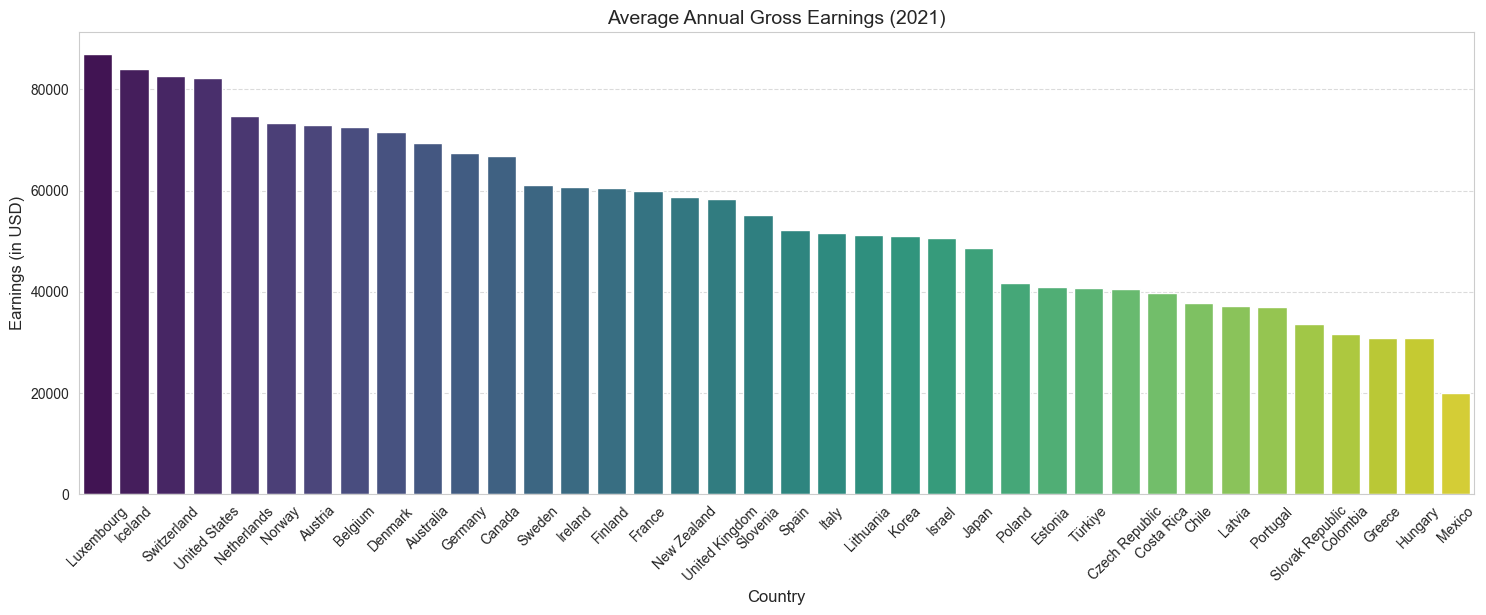

In [114]:
annual_earnings = filter_wellbeing(df_wb, "Average annual gross earnings", "Work and job quality", [2021])
annual_earnings = annual_earnings.sort_values("Value", ascending=False)

plt.figure(figsize=(18, 6))

sns.barplot(data=annual_earnings, x="Country", y="Value", hue="Country", palette="viridis")

plt.title("Average Annual Gross Earnings (2021)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Earnings (in USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

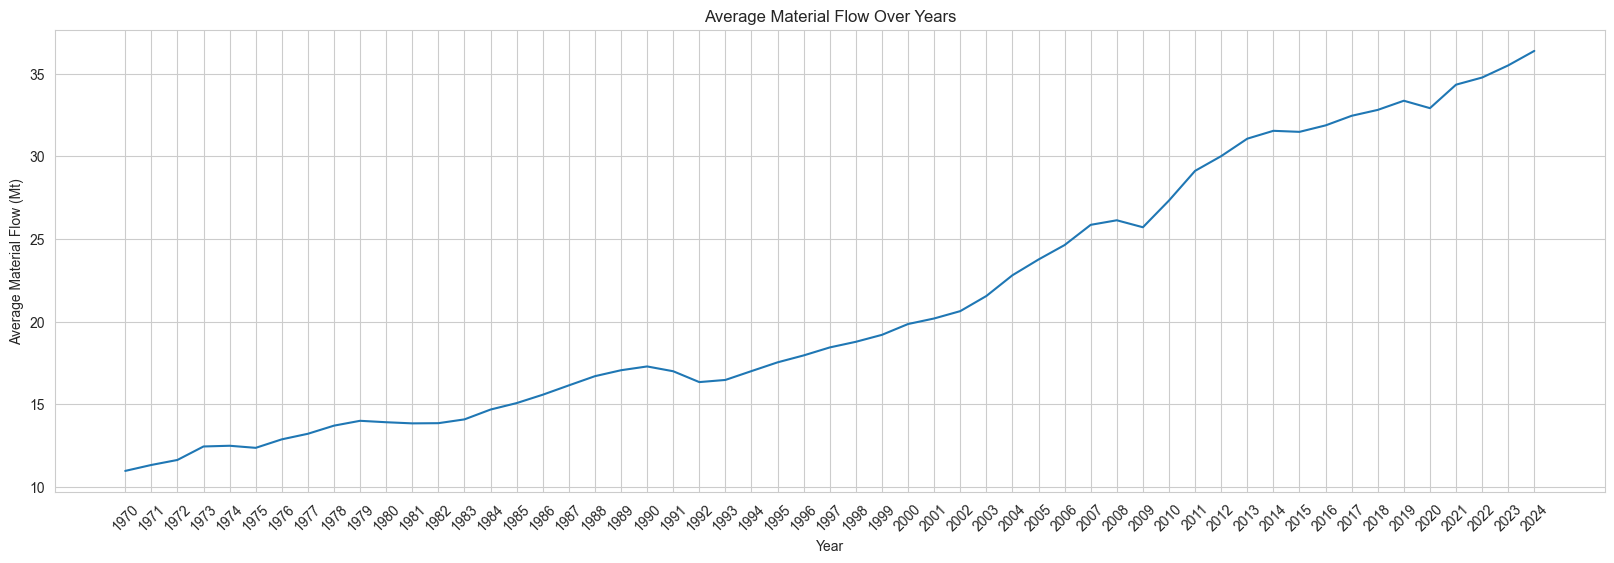

In [128]:
minerals_melted = df_mr.melt(id_vars=['Country', 'Category', 'Flow name', 'Flow code', 'Flow unit'], var_name='Year', value_name='Value')

minerals_melted = minerals_melted.dropna(subset=['Value'])

avg_value_per_year = minerals_melted.groupby('Year')['Value'].mean().reset_index()

avg_value_per_year['Value'] = avg_value_per_year['Value'] / 1_000_000

plt.figure(figsize=(20, 6))
sns.lineplot(data=avg_value_per_year, x='Year', y='Value')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Average Material Flow Over Years')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Average Material Flow (Mt)')
plt.show()

Observation: An analysis of material flow data reveals notable declines in the years 2009 and 2020, coinciding with significant global economic downturns. These patterns underscore the sensitivity of material flows to global economic conditions, highlighting how major crises can lead to substantial reductions in resource extraction and consumption.

##### 3.2.2 Multivariate Analysis

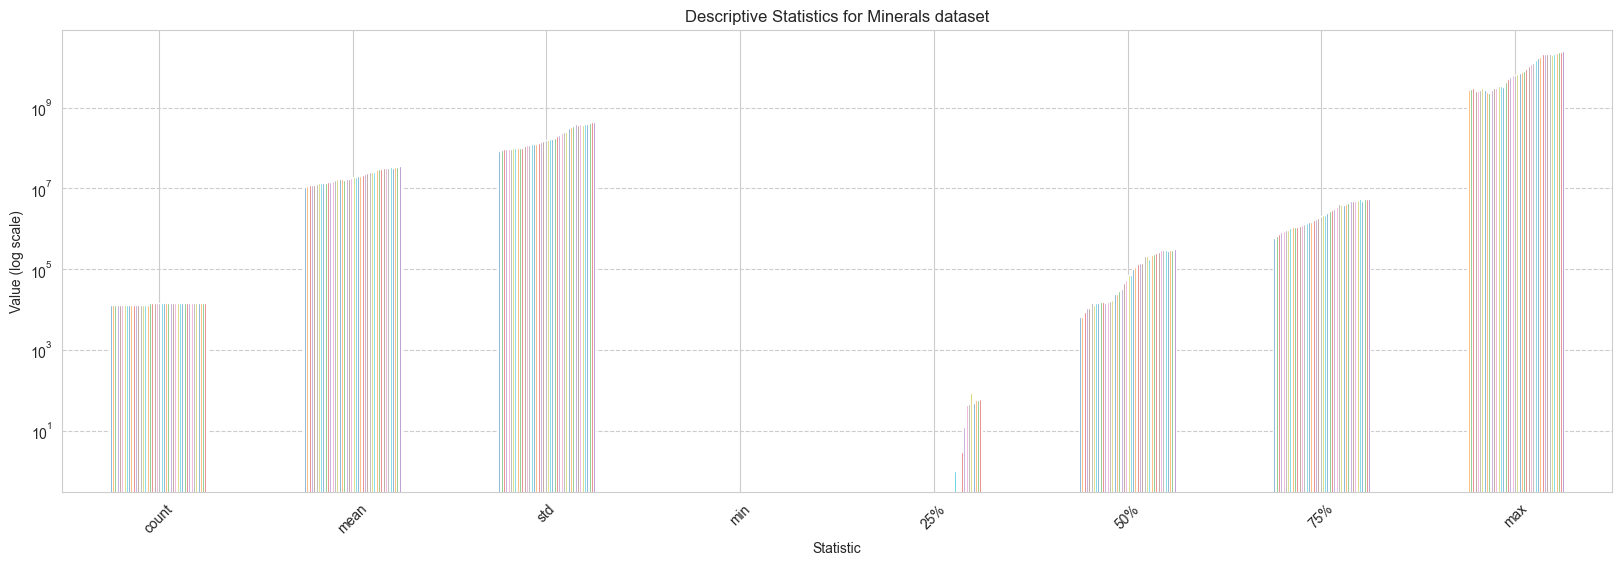

In [91]:
df_mr_dist = df_mr.describe()

df_mr_dist.plot(kind='bar', figsize=(20,6), logy=True) 
plt.title('Descriptive Statistics for Minerals dataset')
plt.xlabel('Statistic')
plt.ylabel('Value (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend().set_visible(False)
plt.show()

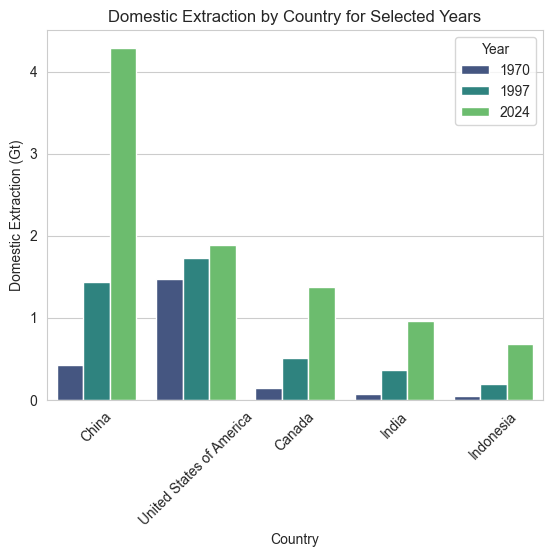

In [92]:
plot_flow_category(df_mr, flow = "Domestic Extraction", category = "Fossil fuels", years = YEARS)

Observation: In the above plot, the major players in the industry of domestic extraction of fossil fuels are displayed, along with their evolution on 3 equidistant year landmarks.

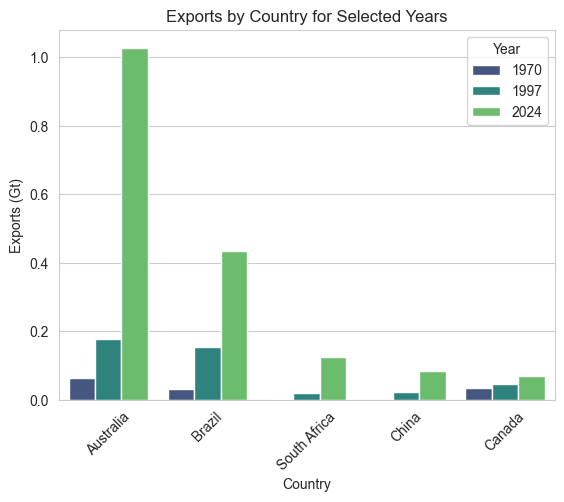

In [93]:
plot_flow_category(df_mr, flow = "Exports", category = "Metal ores", years = YEARS)

Observation: Above it is displayed a plot about the major countries that export metal ores, on the same 3 year landmarks

In [94]:
df_current = filter_minerals(df_mr, flow_name = "Domestic Extraction", category = "Fossil fuels", year = [])
plot_map(df_current, title = "Domestic Extraction of Fossil Fuels", year = [])

In [95]:
df_imports = filter_minerals(df_mr, flow_name = "Imports", category = "Metal ores", year = [])
plot_map(df_imports, title = "Imports of Metal Ores", year = [])

In [96]:
df_exports = filter_minerals(df_mr, flow_name = "Exports", category = "Metal ores", year = [])
plot_map(df_exports, title = "Exports of Metal Ores", year = [])

In [97]:
df_exports = filter_minerals(df_mr, flow_name = "Exports", category = "Fossil fuels", year = [])
plot_map(df_exports, title = "Exports of Fossil fuels", year = [])

In [98]:
df_employment_rate = filter_wellbeing(df_wb, measure = "Employment rate", domain = "Work and job quality", year = [])
plot_map(df_employment_rate, column = "Value", title = "Employment Rate", year = [])

In [99]:
df_mfp = filter_minerals(df_mr, flow_name = "Material Footprint (RMC)", category = "Biomass", year = [])
plot_map(df_mfp, "2023", "Material Footprint (RMC)", year = [])

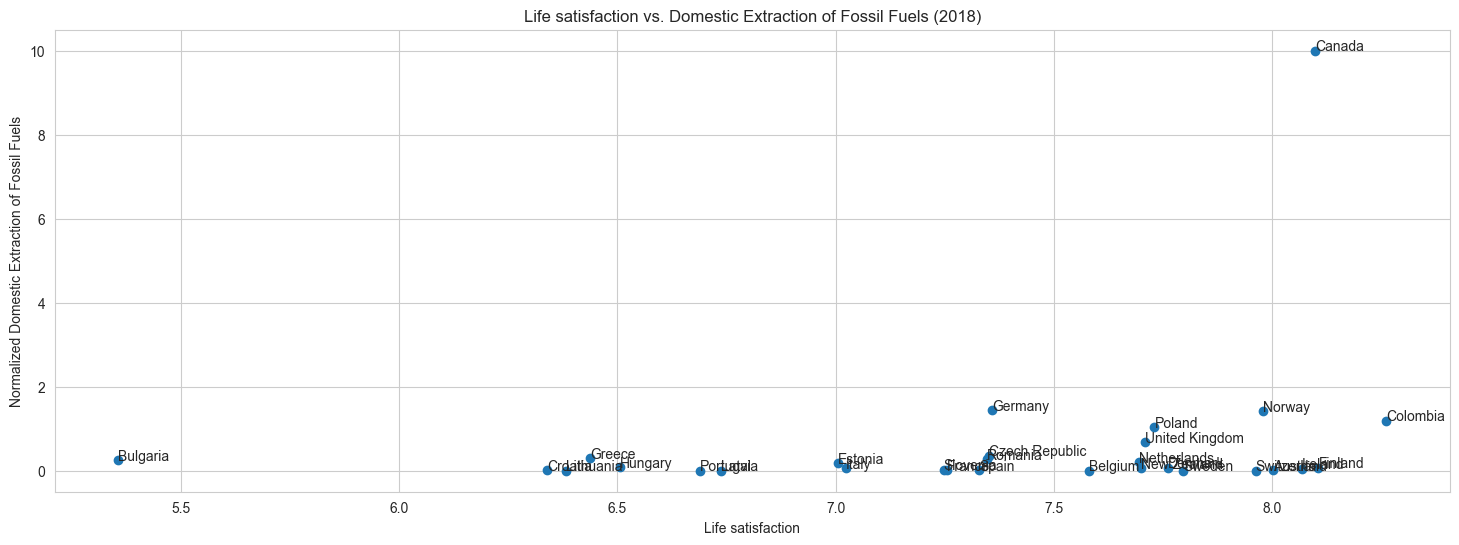

In [130]:
life_satisfaction = filter_wellbeing(df_wb, "Life satisfaction", "Subjective well-being", [2018])
domestic_extraction_fossil_fuels = filter_minerals(df_mr, "Domestic Extraction", "Fossil fuels", [2018])
merged1 = life_satisfaction.merge(domestic_extraction_fossil_fuels, left_on='Country', right_on='Country')

min_val = merged1['Minerals'].min()
max_val = merged1['Minerals'].max()
merged1['Minerals_Scaled'] = 10 * (merged1['Minerals'] - min_val) / (max_val - min_val)

plt.figure(figsize=(18, 6))
plt.scatter(merged1['Value'], merged1['Minerals_Scaled'])

for i, row in merged1.iterrows():
    plt.text(row['Value'], row['Minerals_Scaled'], row['Country'])

plt.xlabel('Life satisfaction')
plt.ylabel('Normalized Domestic Extraction of Fossil Fuels')
plt.title('Life satisfaction vs. Domestic Extraction of Fossil Fuels (2018)')
plt.grid(True)
plt.show()

<Figure size 2000x3000 with 0 Axes>

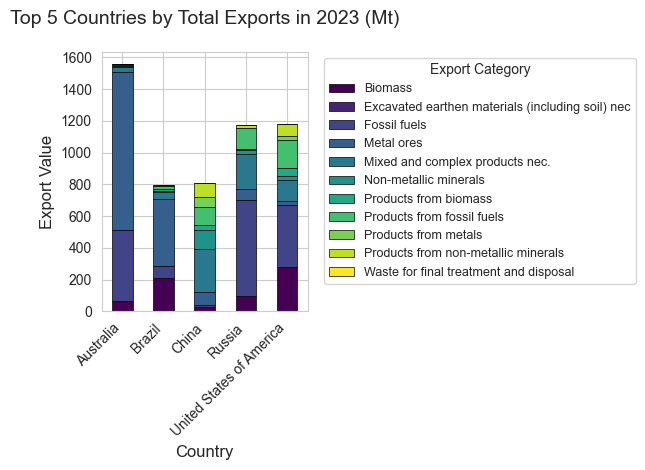

In [101]:
exports = df_mr[["Country", "Category", "Flow name", "2023"]][df_mr["Flow name"] == "Exports"]

exports["2023"] = exports["2023"] / 1000000

country_totals = exports.groupby('Country')['2023'].sum()
top_countries = country_totals.nlargest(5).index

df_top5 = exports[exports['Country'].isin(top_countries)]

pivot_df = df_top5.pivot(index='Country', columns='Category', values='2023').fillna(0)

plt.figure(figsize=(20, 30))

sns.set_style("whitegrid")
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', linewidth=0.5)

plt.title('Top 5 Countries by Total Exports in 2023 (Mt)', fontsize=14, pad=20)
plt.ylabel('Export Value', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Export Category', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=9)

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()

plt.show()

<Figure size 2000x600 with 0 Axes>

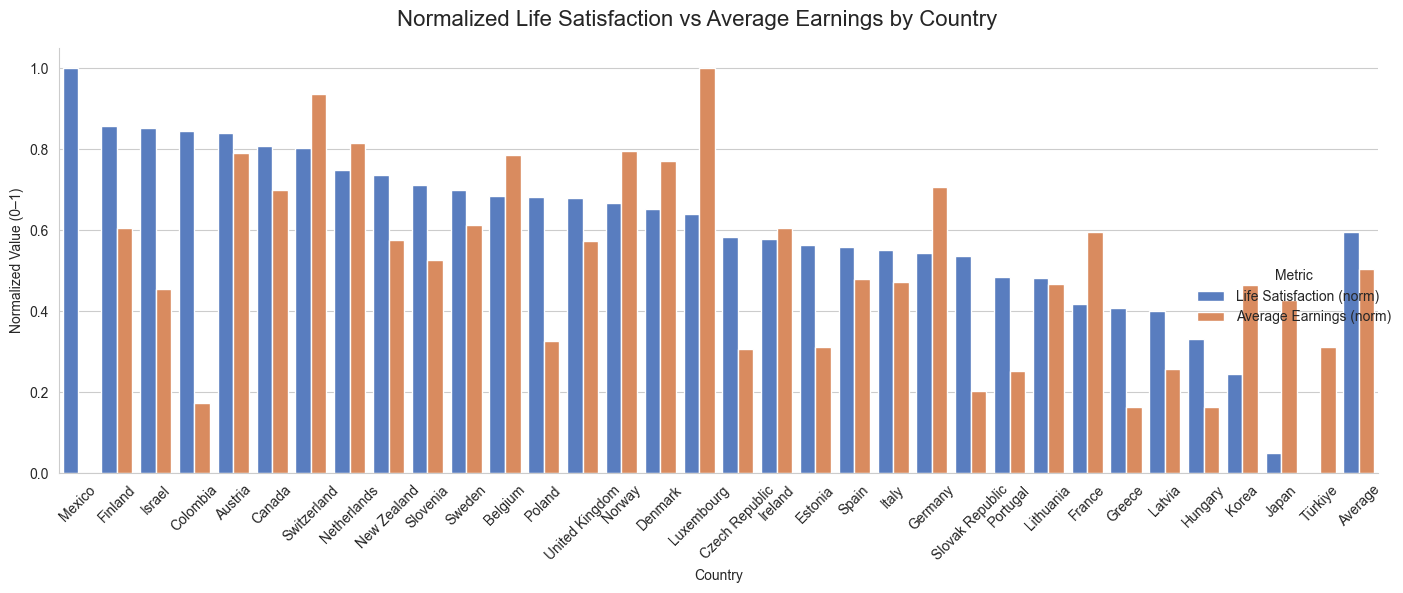

In [ ]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_current = filter_wellbeing(df_wb, "Life satisfaction", "Subjective well-being", [2021])

merged_df = pd.merge(df_current, annual_earnings, on='Country')

merged_df = merged_df[["Country", "Value_x", "Value_y"]]

merged_df['Life Satisfaction (norm)'] = normalize(merged_df['Value_x'])
merged_df['Average Earnings (norm)'] = normalize(merged_df['Value_y'])

merged_df = merged_df.sort_values(by='Life Satisfaction (norm)', ascending=False)

plot_df = pd.melt(
    merged_df,
    id_vars='Country',
    value_vars=['Life Satisfaction (norm)', 'Average Earnings (norm)'],
    var_name='Metric',
    value_name='Normalized Value'
)

avg_life = merged_df['Life Satisfaction (norm)'].mean()
avg_earn = merged_df['Average Earnings (norm)'].mean()

average_data = pd.DataFrame({
    'Country': ['Average', 'Average'],
    'Metric': ['Life Satisfaction (norm)', 'Average Earnings (norm)'],
    'Normalized Value': [avg_life, avg_earn]
})

plot_df = pd.concat([plot_df, average_data], ignore_index=True)

plt.figure(figsize=(20, 6))

g = sns.catplot(
    data=plot_df,
    kind='bar',
    x='Country',
    y='Normalized Value',
    hue='Metric',
    height=6,
    aspect=2,
    palette='muted'
)

# Customize the plot
g.set_axis_labels('Country', 'Normalized Value')
g.fig.suptitle('Normalized Life Satisfaction vs Average Earnings by Country', fontsize=16)
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

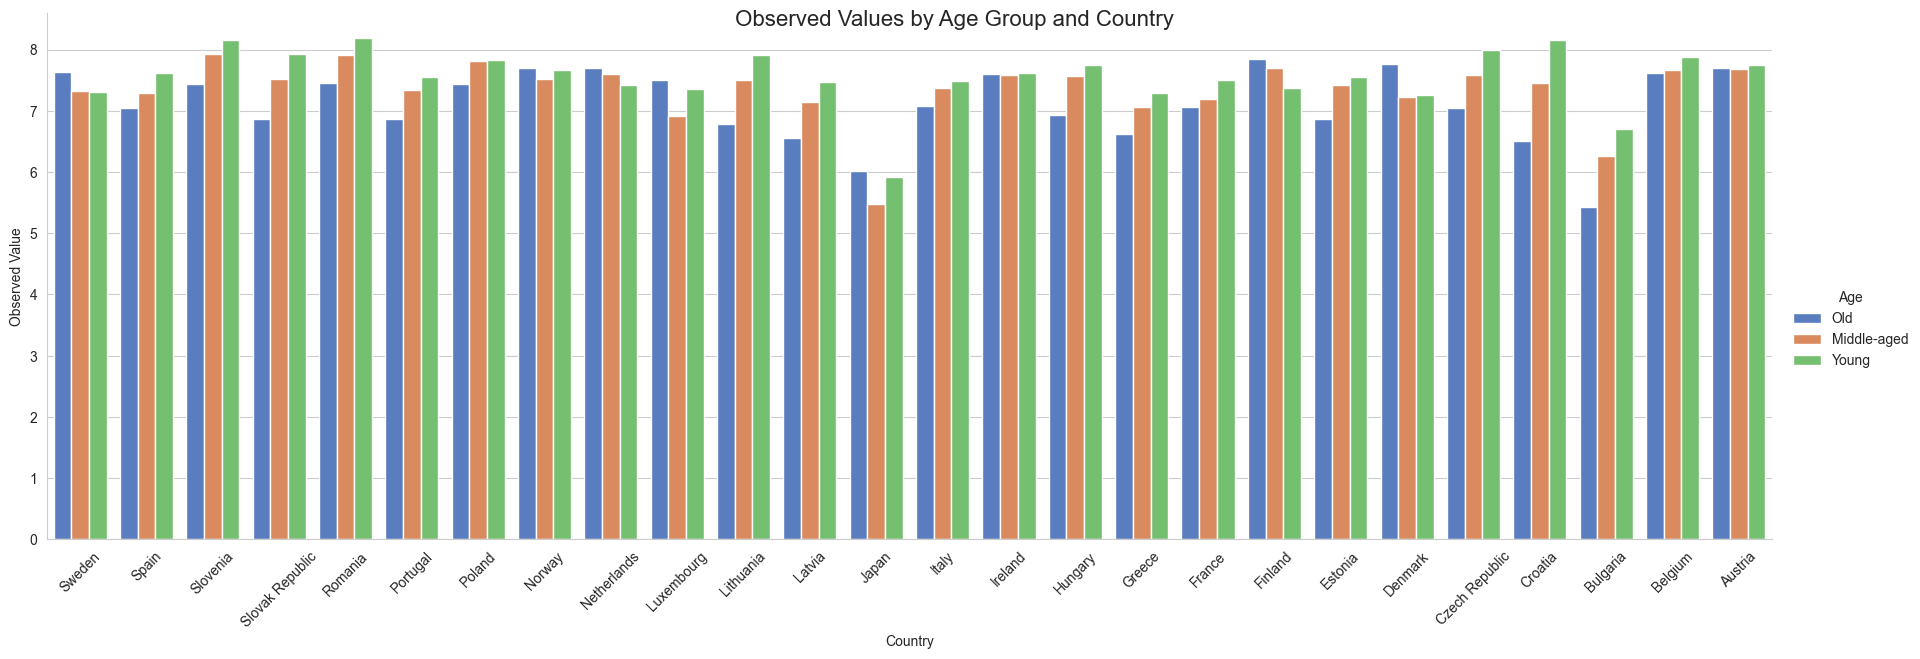

In [103]:
df_life_satisfaction_age = df_wb[(df_wb["Measure"] == "Life satisfaction") & (df_wb["Domain"] == "Subjective well-being") & (df_wb["TIME_PERIOD"] == 2023) & (df_wb["Age"] != "Total")]
df_life_satisfaction_age = df_life_satisfaction_age[["Reference area", "Age", "OBS_VALUE"]]
df_life_satisfaction_age = df_life_satisfaction_age.sort_values(["Reference area", "OBS_VALUE"], ascending=[False, False])

age_counts = df_life_satisfaction_age.groupby('Reference area')['Age'].nunique()

valid_countries = age_counts[age_counts == 3].index
filtered_df = df_life_satisfaction_age[df_life_satisfaction_age['Reference area'].isin(valid_countries)]

g = sns.catplot(
    data=filtered_df,
    kind='bar',
    x='Reference area',
    y='OBS_VALUE',
    hue='Age',
    height=6,
    aspect=3,
    palette='muted'
)

g.set_axis_labels('Country', 'Observed Value')
g.fig.suptitle('Observed Values by Age Group and Country', fontsize=16)
g.set_xticklabels(rotation=45)
plt.show() 

Observation: Most countries have similar average values across age groups, while Japan has a low average rating of life satisfaction across the 3 age groups, and Bulgaria and Croatia have a similar pattern where the "old" age group have a lower rating on life satisfaction than "young" age group.

### 3.3 Anomalies

C:\Users\adi\AppData\Local\Temp\ipykernel_17544\456766074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_anomaly, x="Year", y="Value", palette="viridis")


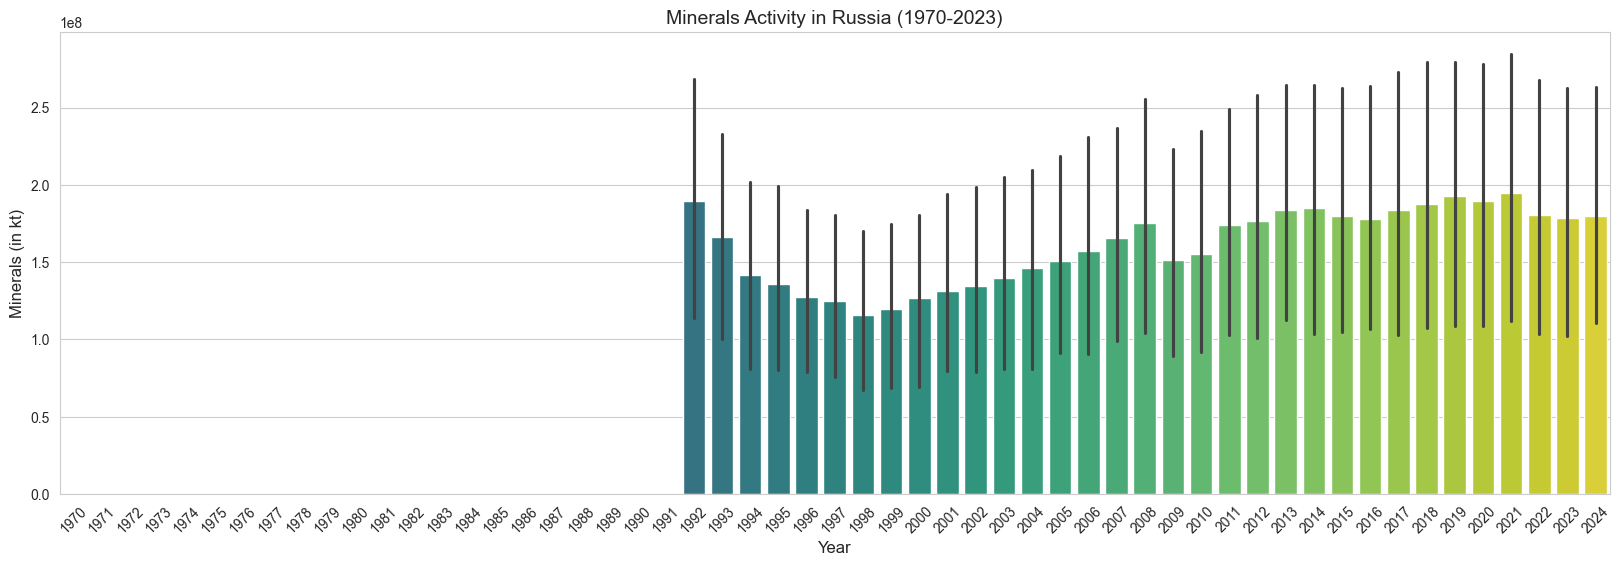

In [104]:
df_anomaly = df_mr_transposed[df_mr_transposed["Country"] == "Russia"]
df_anomaly

plt.figure(figsize=(20, 6))
sns.barplot(data=df_anomaly, x="Year", y="Value", palette="viridis")
plt.title("Minerals Activity in Russia (1970-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Minerals (in kt)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Observation: Russian Federation did not report any activity on minerals industry until 1992, this can be related to the collapse of the Soviet Union, along with a descending trend of tonnes, indicating that before the first reports it might have been a greater minerals extraction than reported.

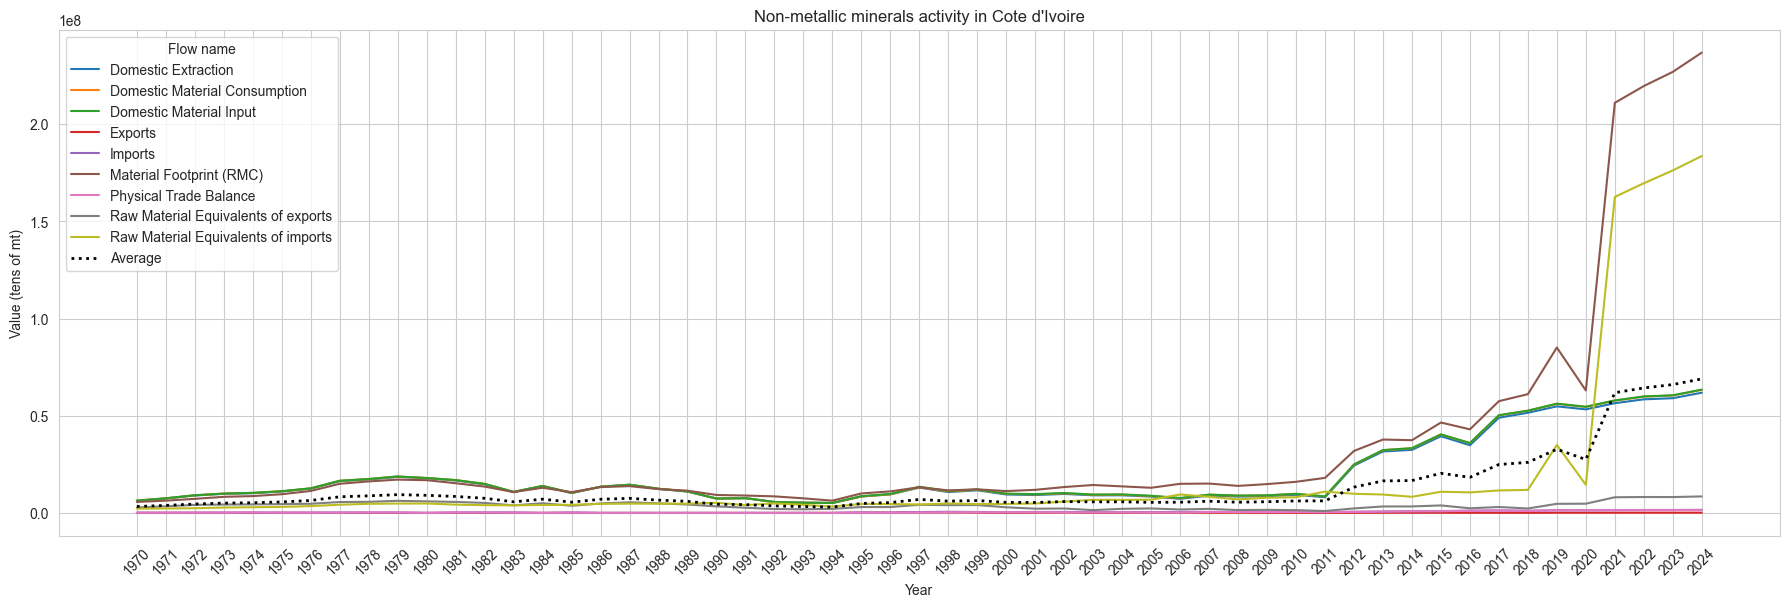

In [105]:
df_cote = filter_minerals(df_mr, category = "Non-metallic minerals", year = [])
df_cote = df_cote[df_cote["Country"] == "Cote d'Ivoire"]

df_grouped = df_cote.groupby(['Flow name', 'Year'])['Value'].sum().reset_index()

filtered = []
for flow in df_grouped['Flow name'].unique():
    subset = df_grouped[df_grouped['Flow name'] == flow].sort_values('Year')
    first_non_zero_idx = subset['Value'].ne(0).idxmax()
    start_year = subset.loc[first_non_zero_idx, 'Year']
    filtered.append(subset[subset['Year'] >= start_year])

df_filtered = pd.concat(filtered)

average_per_year = (
    df_filtered.groupby('Year')['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'Average'})
)

plt.figure(figsize=(18, 6))

for flow in df_filtered['Flow name'].unique():
    subset = df_filtered[df_filtered['Flow name'] == flow]
    plt.plot(subset['Year'], subset['Value'], label=flow)

plt.plot(
    average_per_year['Year'],
    average_per_year['Average'],
    color='black',
    linestyle='dotted',
    linewidth=2,
    label='Average'
)

plt.title('Non-metallic minerals activity in Cote d\'Ivoire')
plt.xlabel('Year')
plt.ylabel('Value (tens of mt)')
plt.legend(title='Flow name', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

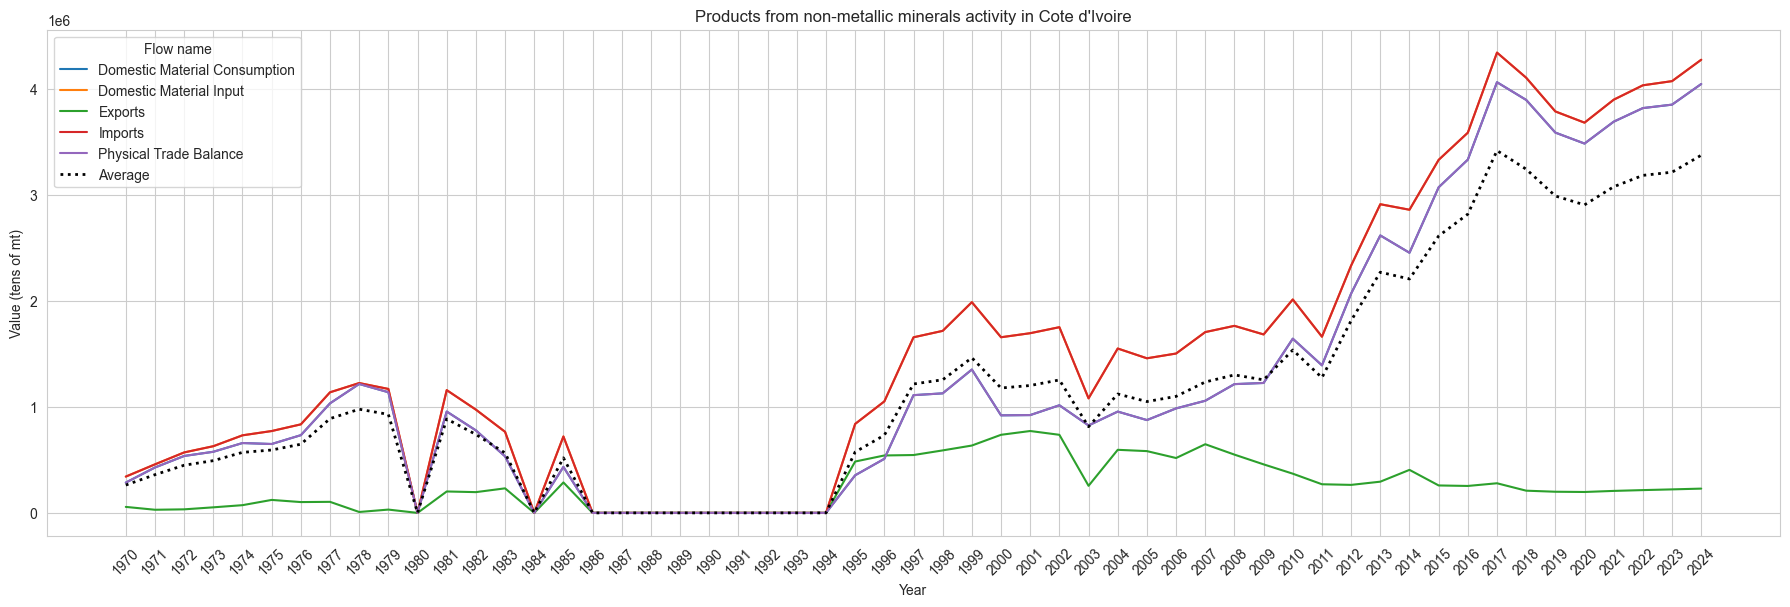

In [106]:
df_cote = filter_minerals(df_mr, category = "Products from non-metallic minerals", year = [])
df_cote = df_cote[df_cote["Country"] == "Cote d'Ivoire"]

df_grouped = df_cote.groupby(['Flow name', 'Year'])['Value'].sum().reset_index()

filtered = []
for flow in df_grouped['Flow name'].unique():
    subset = df_grouped[df_grouped['Flow name'] == flow].sort_values('Year')
    first_non_zero_idx = subset['Value'].ne(0).idxmax()
    start_year = subset.loc[first_non_zero_idx, 'Year']
    filtered.append(subset[subset['Year'] >= start_year])

df_filtered = pd.concat(filtered)

average_per_year = (
    df_filtered.groupby('Year')['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'Average'})
)

plt.figure(figsize=(18, 6))

for flow in df_filtered['Flow name'].unique():
    subset = df_filtered[df_filtered['Flow name'] == flow]
    plt.plot(subset['Year'], subset['Value'], label=flow)

plt.plot(
    average_per_year['Year'],
    average_per_year['Average'],
    color='black',
    linestyle='dotted',
    linewidth=2,
    label='Average'
)

plt.title('Products from non-metallic minerals activity in Cote d\'Ivoire')
plt.xlabel('Year')
plt.ylabel('Value (tens of mt)')
plt.legend(title='Flow name', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

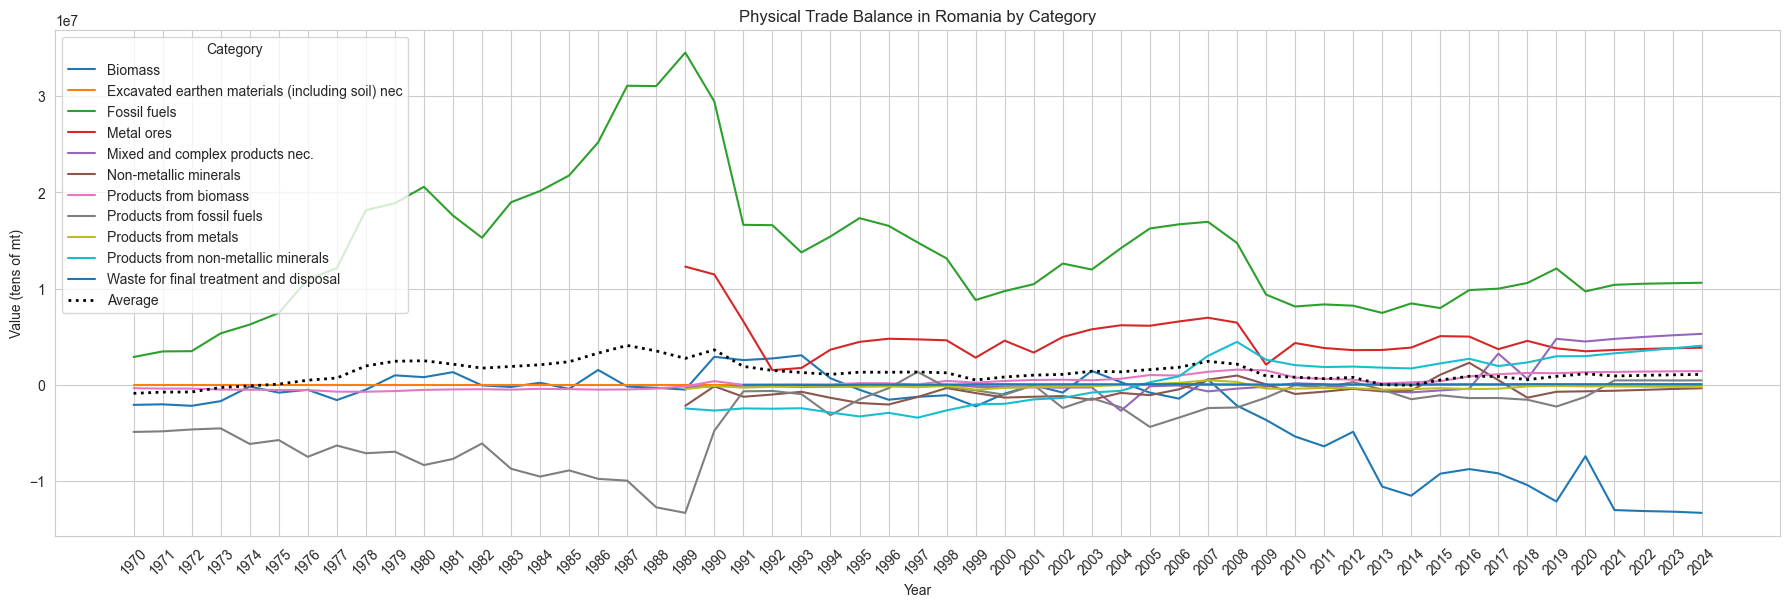

In [107]:
df_romania_ptb = filter_minerals(df_mr, flow_name = "Physical Trade Balance", year = [])
df_romania_ptb = df_romania_ptb[df_romania_ptb["Country"] == "Romania"]

df_grouped = df_romania_ptb.groupby(['Category', 'Year'])['Value'].sum().reset_index()

filtered = []
for flow in df_grouped['Category'].unique():
    subset = df_grouped[df_grouped['Category'] == flow].sort_values('Year')
    first_non_zero_idx = subset['Value'].ne(0).idxmax()
    start_year = subset.loc[first_non_zero_idx, 'Year']
    filtered.append(subset[subset['Year'] >= start_year])

df_filtered = pd.concat(filtered)

average_per_year = (
    df_filtered.groupby('Year')['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'Average'})
)

plt.figure(figsize=(18, 6))

for cat in df_filtered['Category'].unique():
    subset = df_filtered[df_filtered['Category'] == cat]
    plt.plot(subset['Year'], subset['Value'], label=cat)

plt.plot(
    average_per_year['Year'],
    average_per_year['Average'],
    color='black',
    linestyle='dotted',
    linewidth=2,
    label='Average'
)

plt.title('Physical Trade Balance in Romania by Category')
plt.xlabel('Year')
plt.ylabel('Value (tens of mt)')
plt.legend(title='Category', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()